## JP Morgan Test (Sergio Meana):
- 1. What are the mean, median and standard deviation of the “perimeter” feature?
- 2. Is the first feature in this data set (the “radius”) normally distributed? Please quantitatively define you answer. If not, what might be a more appropriate distribution?
- 3. Train a classifier to predict the diagnosis of malignant or benign. Please compare the results of two classifiers e.g. SVM, logistic regression, decision tree etc.
 

### Loading Dataset

In [5]:
# Importing libraries needed and dataset 
import pandas as pd

CSV_TO_LOAD = 'data.csv'

pd.set_option('float_format', '{:.2f}'.format)
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_ste', 'texture_ste', 'perimeter_ste', 'area_ste', 'smoothness_ste', 'compactness_ste', 'concavity_ste', 'concave_points_se', 'symmetry_ste', 'fractal_dimension_ste', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv(CSV_TO_LOAD, header=None, index_col='id', names=columns, low_memory=False)


In [6]:
df.sample(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
922296           B        13.21         28.06           84.88     538.40   
8670             M        15.46         19.48          101.70     748.90   
857374           B        11.94         18.24           75.71     437.60   
88299702         M        23.21         26.97          153.50    1670.00   
8910499          B        13.59         21.84           87.16     561.00   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
922296               0.09              0.07            0.03   
8670                 0.11              0.12            0.15   
857374               0.08              0.05            0.02   
88299702             0.10              0.17            0.20   
8910499              0.08              0.08            0.04   

          concave_points_mean  symmetry_mean           ...             \
id                                                     ...              
922296                   0.03           0.16           ...              
8670                     0.08           0.19           ...              
857374                   0.01           0.19           ...              
88299702                 0.12           0.19           ...              
8910499                  0.02           0.16           ...              

          radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                   
922296           14.37          37.17            92.48      629.60   
8670             19.26          26.00           124.90     1156.00   
857374           13.10          21.33            83.67      527.20   
88299702         31.01          34.51           206.00     2944.00   
8910499          14.80          30.04            97.66      661.50   

          smoothness_worst  compactness_worst  concavity_worst  \
id                                                               
922296                0.11               0.14             0.11   
8670                  0.15               0.24             0.38   
857374                0.11               0.09             0.09   
88299702              0.15               0.41             0.58   
8910499               0.10               0.17             0.15   

          concave_points_worst  symmetry_worst  fractal_dimension_worst  
id                                                                       
922296                    0.08            0.25                     0.06  
8670                      0.15            0.28                     0.08  
857374                    0.06            0.28                     0.07  
88299702                  0.26            0.31                     0.09  
8910499                   0.06            0.24                     0.07  

[5 rows x 31 columns]

In [7]:
# Testing all the values has been properly loaded as float64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_ste                 569 non-null float64
texture_ste                569 non-null float64
perimeter_ste              569 non-null float64
area_ste                   569 non-null float64
smoothness_ste             569 non-null float64
compactness_ste            569 non-null float64
concavity_ste              569 non-null float64
concave_points_se        

### 1. What are the mean, median and standard deviation of the “perimeter” feature?



In [8]:
# check of NaN values that can compromise the result
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_ste                 0
texture_ste                0
perimeter_ste              0
area_ste                   0
smoothness_ste             0
compactness_ste            0
concavity_ste              0
concave_points_se          0
symmetry_ste               0
fractal_dimension_ste      0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# we have already a column with the perimeter 'mean','std_error' and 'worst' per observation
# Let's consider the perimeter mean to calculate the mean, std and median for all the cells nucleus

s = 'Perimeter mean: {:.2f} \nPerimeter median: {:.2f}\nPerimeter std: {:.2f}'
print(s.format(df['perimeter_mean'].mean(),df['perimeter_mean'].median(),df['perimeter_mean'].std()))

Perimeter mean: 91.97 
Perimeter median: 86.24
Perimeter std: 24.30


### 2. Is the first feature in this data set (the “radius”) normally distributed? Please quantitatively define you answer. If not, what might be a more appropriate distribution?

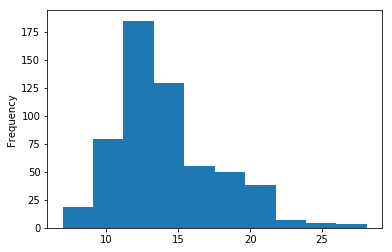

In [10]:
# Histogram plot (we can see that we don't have a normal-Gaussian distribution due the simmetry, mean and std values)
df['radius_mean'].plot(kind = 'hist')

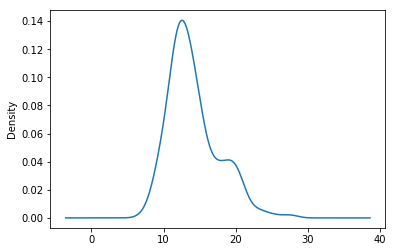

In [35]:
df['radius_mean'].plot(kind = 'density')

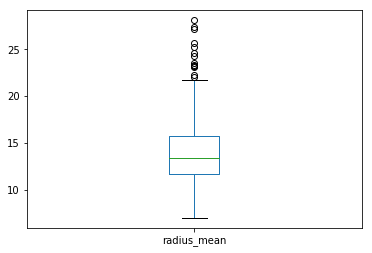

In [46]:
df['radius_mean'].plot(kind = 'box')

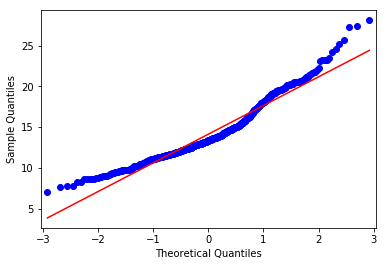

In [11]:
# 2nd check: Quantile-Quantile Plot (scatter points should fit the diagonal line to have a Gaussian distribution )
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

stat, p = shapiro(df['radius_mean'])
qqplot(df['radius_mean'], line='s')
pyplot.show()

In [44]:
# 3rd Check: We assume that that the sample was drawn from a Gaussian distribution. 
# we use an alpha of 5% to interpret the p-value.
print('p-value: {}\np-value < alpha -> Not a Gaussian distribution '.format(p))

p-value: 3.1061551985026026e-14
p-value < alpha -> Not a Gaussian distribution 


- After the three tests done, we can conclude that the distribution is not Gaussian, we can do more testing with, kurtosis, skewness, Anderson-Darling Test etc.

### 3. Train a classifier to predict the diagnosis of malignant or benign. Please compare the results of two classifiers e.g. SVM, logistic regression, decision tree etc.
- Some classification Ml models expect a normal distribution of the data
- I am gonna use all the variables to train the model as requested, but a correlation and ploting should be needed to check if all the variables compromise the diagnosis. 

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

X = df.iloc[:,1:].values
y = df['diagnosis'].values

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [103]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)*100
print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
print('\nAccuracy: {:.2f} % '.format(ac))


[[65  2]
 [ 2 45]]

Accuracy: 96.49 % 


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest 

In [104]:
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)
print(confusion_matrix(y_test, y_pred_2))
ac2 = accuracy_score(y_test, y_pred_2)*100
print('\nAccuracy: {:.2f} % '.format(ac2))

[[64  3]
 [ 2 45]]

Accuracy: 95.61 % 


### SVM

In [17]:
model_3 = SVC(kernel='linear', random_state=0)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
print(confusion_matrix(y_test, y_pred_3))
ac3 = accuracy_score(y_test, y_pred_3)*100
print('\nAccuracy: {:.2f} % '.format(ac3))

[[66  1]
 [ 1 46]]

Accuracy: 98.25 % 


### Neural Networks

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model_4 = Sequential()
model_4.add(Dense(units=128, kernel_initializer='uniform', activation='relu', input_dim=30))
model_4.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model_4.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history  = model_4.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.1)

y_pred_4 = model_4.predict(X_test)
y_pred_4 = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred_4))
ac4 = accuracy_score(y_test, y_pred_4)*100
print('\nAccuracy: {:.2f} % '.format(ac4))

Train on 409 samples, validate on 46 samples
Epoch 1/100
409/409 [==============================] - 0s 841us/sample - loss: 0.5655 - accuracy: 0.9315 - val_loss: 0.3167 - val_accuracy: 0.9783
Epoch 2/100
409/409 [==============================] - 0s 200us/sample - loss: 0.1444 - accuracy: 0.9609 - val_loss: 0.1012 - val_accuracy: 0.9565
Epoch 3/100
409/409 [==============================] - 0s 189us/sample - loss: 0.0818 - accuracy: 0.9707 - val_loss: 0.0800 - val_accuracy: 0.9565
Epoch 4/100
409/409 [==============================] - 0s 208us/sample - loss: 0.0674 - accuracy: 0.9853 - val_loss: 0.0675 - val_accuracy: 0.9565
Epoch 5/100
409/409 [==============================] - 0s 186us/sample - loss: 0.0615 - accuracy: 0.9878 - val_loss: 0.0637 - val_accuracy: 0.9565
Epoch 6/100
409/409 [==============================] - 0s 188us/sample - loss: 0.0554 - accuracy: 0.9853 - val_loss: 0.0678 - val_accuracy: 0.9565
Epoch 7/100
409/409 [==============================] - 0s 188us/sample - 

409/409 [==============================] - 0s 184us/sample - loss: 7.6491e-04 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9783
Epoch 57/100
409/409 [==============================] - 0s 178us/sample - loss: 7.4317e-04 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9783
Epoch 58/100
409/409 [==============================] - 0s 191us/sample - loss: 6.7457e-04 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9783
Epoch 59/100
409/409 [==============================] - 0s 183us/sample - loss: 6.4224e-04 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9783
Epoch 60/100
409/409 [==============================] - 0s 191us/sample - loss: 5.9980e-04 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9783
Epoch 61/100
409/409 [==============================] - 0s 182us/sample - loss: 5.9012e-04 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9783
Epoch 62/100
409/409 [==============================] - 0s 191us/sample - loss: 5.1560e-04 - accuracy

In [28]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


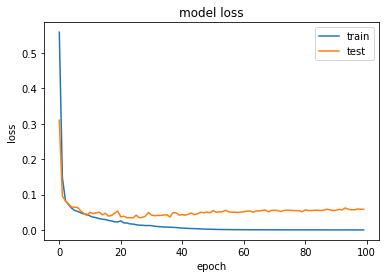

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

###  Notes:
- We see clearly a lot of thing to optimize:
 - Reducing number of neurons, and probably the second layer
 - We can reduce epochs
 - Optimize all the hyperparameter with `GridSearchCV`:
  - Try RMSPROP and tune ADAM with a bigger learning rate and less Decay as the model converge quite good
  - Play with different batch sizes and initializers for weights 
  - Try cross validation (applicable as well for our previous models) trying to fit as much as posible because of the small dataset. If we realise of overfitting 0.1-0.2 dropout or L2 Normalization will fix it.